In [2]:
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
def draw_graph(G, highlight_edges=None, output_file=None):
    pos = nx.nx_agraph.graphviz_layout(G)
    # pos = nx.spring_layout(G)
    network_options = {
        "pos": pos,
        "font_size": 16,
        "font_color": 'w',
        "font_family": "monospace",
        "node_size": 1000,
    }

    if G.is_directed():
        network_options["arrowsize"] = 20

    edge_labels_options = {
        "pos": pos,
        "edge_labels": nx.get_edge_attributes(G, 'weight'),
        "font_size": 12,
        "font_family": "monospace",
        "rotate": False,
    }
    nx.draw_networkx(G, **network_options)

    if highlight_edges:
        edges_options = {
            "pos": pos,
            "edgelist": highlight_edges,
            "width": 5,
            "alpha": 0.5,
            "edge_color": "tab:orange",
        }
        nx.draw_networkx_edges(G, **edges_options)

    nx.draw_networkx_edge_labels(G, **edge_labels_options)
    plt.axis("off")
    plt.tight_layout()

    if output_file:
        plt.savefig(output_file)

    plt.show()

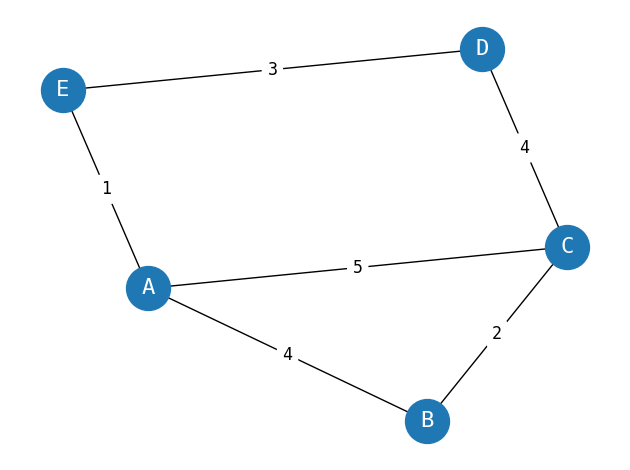

In [4]:
G = nx.Graph()
G.add_edge('A', 'B', weight=4)
G.add_edge('A', 'C', weight=5)
G.add_edge('A', 'E', weight=1)
G.add_edge('B', 'C', weight=2)
G.add_edge('C', 'D', weight=4)
G.add_edge('D', 'E', weight=3)

draw_graph(G, output_file='figuras/grafo-con-pesos.png')

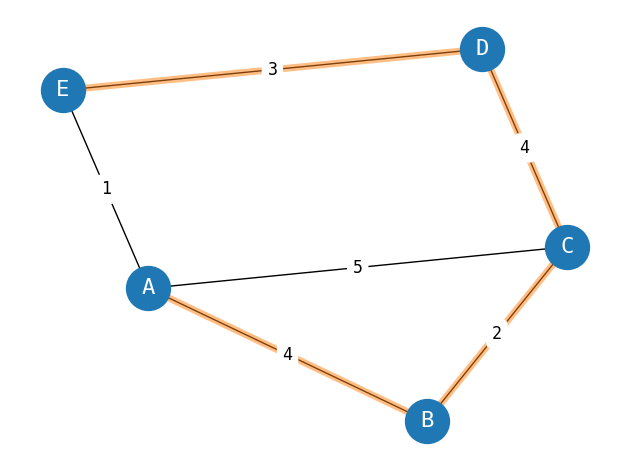

In [5]:
path = next(nx.all_simple_paths(G, source='A', target='E'))
highlight_edges = list(zip(path,path[1:]))

draw_graph(G, highlight_edges=highlight_edges, output_file='figuras/grafo-camino.png')

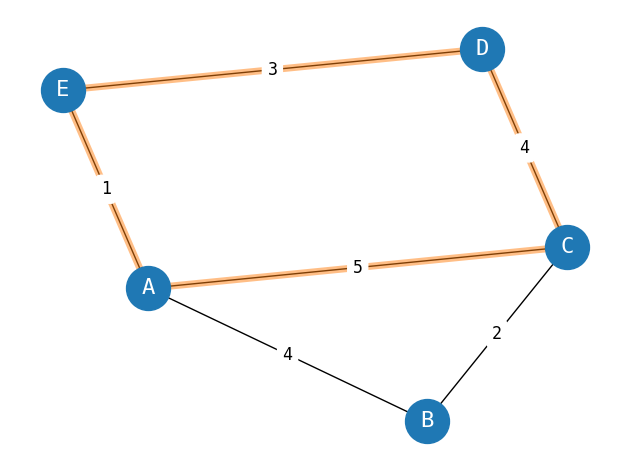

In [6]:
cycle = nx.cycle_basis(G, root='E')[0]
highlight_edges = list(zip(cycle, cycle[1:]+cycle[:1]))

draw_graph(G, highlight_edges=highlight_edges, output_file='figuras/grafo-ciclo.png')

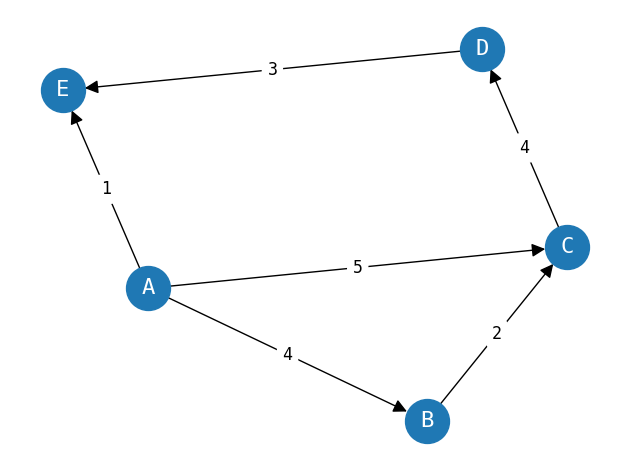

In [7]:
G = nx.DiGraph()
G.add_edge('A', 'B', weight=4)
G.add_edge('A', 'C', weight=5)
G.add_edge('A', 'E', weight=1)
G.add_edge('B', 'C', weight=2)
G.add_edge('C', 'D', weight=4)
G.add_edge('D', 'E', weight=3)

draw_graph(G, output_file='figuras/grafo-dirigido.png')